# Introduction to machine learning: classification of basalt source

## Import scientific python libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd
pd.set_option('display.max_columns', None)

## Machine learning
Text from: https://scikit-learn.org/stable/tutorial/basic/tutorial.html

In general, a learning problem considers a set of n samples of data and then tries to predict properties of unknown data. If each sample is more than a single number and, for instance, a multi-dimensional entry (aka multivariate data), it is said to have several attributes or features.

Learning problems fall into a few categories:
- **supervised learning**, in which the data comes with additional attributes that we want to predict (https://scikit-learn.org/stable/supervised_learning.html). This problem can be either:
    - *regression*: if the desired output consists of one or more continuous variables, then the task is called regression. An example of a regression problem would be the prediction of the length of a salmon as a function of its age and weight.
    - *classification*: samples belong to two or more classes and we want to learn from already labeled data how to predict the class of unlabeled data. An example of a classification problem would be handwritten digit recognition, in which the aim is to assign each input vector to one of a finite number of discrete categories. Another way to think of classification is as a discrete (as opposed to continuous) form of supervised learning where one has a limited number of categories and for each of the n samples provided, one is to try to label them with the correct category or class.

- **unsupervised learning**, in which the training data consists of a set of input vectors x without any corresponding target values. The goal in such problems may be to discover groups of similar examples within the data, where it is called clustering, or to determine the distribution of data within the input space, known as density estimation, or to project the data from a high-dimensional space down to two or three dimensions for the purpose of visualization (https://scikit-learn.org/stable/unsupervised_learning.html).

### Training set and testing set

Machine learning is about learning some properties of a data set and then testing those properties against another data set. A common practice in machine learning is to evaluate an algorithm by splitting a data set into two. We call one of those sets the training set, on which we learn some properties; we call the other set the testing set, on which we test the learned properties.

**Today we will focus on classification through a supervised learning approach**

*Systems doing this type of analysis are all around us. Consider a spam filter for example*

# Classifying volcanic rocks

<img src="./images/volcanic-tectonics.png" width = 600 align = 'center'>

Today we are going to deal with igneous geochemistry data. Igneous rocks are those that crystallize from cooling magma. Different magmas have different compositions associated with their origin as we explored a week ago. During class today, we will focus on data from mafic lava flows (these are called basalts and are the relatively low silica, high iron end of what we looked at last week).

> Igneous rocks form in a wide variety of tectonic settings,
including mid-ocean ridges, ocean islands, and volcanic
arcs. It is a problem of great interest to igneous petrologists
to recover the original tectonic setting of mafic rocks of the
past. When the geological setting alone cannot unambiguously
resolve this question, the chemical composition of
these rocks might contain the answer. The major, minor,
and trace elemental composition of basalts shows large
variations, for example as a function of formation depth
(e.g., Kushiro and Kuno, 1963) --- *Vermeesch (2006)*

For this analysis, we are going to use a dataset that was compiled in 

Vermeesch (2006) Tectonic discrimination of basalts with classification trees, *Geochimica et Cosmochimica Acta*  https://doi.org/10.1016/j.gca.2005.12.016

These data were grouped into 3 categories:

- 256 ***Island arc basalts (IAB)*** from the Aeolian, Izu-Bonin, Kermadec, Kurile, Lesser Antilles, Mariana, Scotia, and Tonga arcs.
- 241 ***Mid-ocean ridge (MORB)*** samples from the East Pacific Rise, Mid Atlantic Ridge, Indian Ocean, and Juan de Fuca Ridge.
- 259 ***Ocean-island (OIB)*** samples from St. Helena, the Canary, Cape Verde, Caroline, Crozet, Hawaii-Emperor, Juan Fernandez, Marquesas, Mascarene, Samoan, and Society islands.

Let's look at the illustration above and determine where each of these settings are within a plate tectonic context

## Import data


The data are from the supplemental materials of the Vermeesch (2006) paper. The samples are grouped by affinity MORB, OIB, and IAB.

In [2]:
basalt_data = pd.read_csv('data/Vermeesch2006.csv')
basalt_data.tail()

,affinity,SiO2_wt_percent,TiO2_wt_percent,Al2O3_wt_percent,Fe2O3_wt_percent,FeO_wt_percent,CaO_wt_percent,MgO_wt_percent,MnO_wt_percent,K2O_wt_percent,Na2O_wt_percent,P2O5(wt%),La_ppm,Ce_ppm,Pr_ppm,Nd_ppm,Sm_ppm,Eu_ppm,Gd_ppm,Tb_ppm,Dy_ppm,Ho_ppm,Er_ppm,Tm_ppm,Yb_ppm,Lu_ppm,Sc_ppm,V_ppm,Cr_ppm,Co_ppm,Ni_ppm,Cu_ppm,Zn_ppm,Ga_ppm,Rb_ppm,Sr_ppm,Y_ppm,Zr_ppm,Nb_ppm,Sn_ppm,Cs_ppm,Ba_ppm,Hf_ppm,Ta_ppm,Pb_ppm,Th_ppm,U_ppm,143Nd/144Nd,87Sr/86Sr,206Pb/204Pb,207Pb/204Pb,208Pb/204Pb
751,IAB,50.97,0.78,18.86,NaN,NaN,10.85,4.71,0.16,0.60,2.38,0.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.0,34.0,152.0,NaN,NaN,7.5,371.0,19.3,56.0,NaN,NaN,NaN,130.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.82,15.556,38.389
752,IAB,51.00,1.41,17.06,3.80,7.04,9.97,4.96,0.17,0.73,2.56,0.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,395.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.70348,NaN,NaN,NaN
753,IAB,52.56,1.21,17.74,2.28,7.53,10.48,5.57,0.24,0.29,2.27,0.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,163.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.70362,NaN,NaN,NaN
754,IAB,52.59,1.50,16.88,2.41,7.90,10.83,4.91,0.26,0.54,1.63,0.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,151.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.70363,NaN,NaN,NaN
755,IAB,52.96,1.27,15.65,2.91,9.32,9.78,4.24,0.23,0.46,2.54,0.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,254.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.70352,NaN,NaN,NaN


In [3]:
print(basalt_data.columns)

Index(['affinity', 'SiO2_wt_percent', 'TiO2_wt_percent', 'Al2O3_wt_percent',
       'Fe2O3_wt_percent', 'FeO_wt_percent', 'CaO_wt_percent',
       'MgO_wt_percent', 'MnO_wt_percent', 'K2O_wt_percent', 'Na2O_wt_percent',
       'P2O5(wt%)', 'La_ppm', 'Ce_ppm', 'Pr_ppm', 'Nd_ppm', 'Sm_ppm', 'Eu_ppm',
       'Gd_ppm', 'Tb_ppm', 'Dy_ppm', 'Ho_ppm', 'Er_ppm', 'Tm_ppm', 'Yb_ppm',
       'Lu_ppm', 'Sc_ppm', 'V_ppm', 'Cr_ppm', 'Co_ppm', 'Ni_ppm', 'Cu_ppm',
       'Zn_ppm', 'Ga_ppm', 'Rb_ppm', 'Sr_ppm', 'Y_ppm', 'Zr_ppm', 'Nb_ppm',
       'Sn_ppm', 'Cs_ppm', 'Ba_ppm', 'Hf_ppm', 'Ta_ppm', 'Pb_ppm', 'Th_ppm',
       'U_ppm', '143Nd/144Nd', '87Sr/86Sr', '206Pb/204Pb', '207Pb/204Pb',
       '208Pb/204Pb'],
      dtype='object')


## Can geochemical data be used to classify the tectonic setting?

These data are labeled. The author already determined what setting these basalts came from. However, is there are way that we could use these labeled data to determine the setting for an unknown basalt?

A paper published in 1982 proposed that the elements titanium and vanadium were particular good at giving insight into tectonic setting. The details of why are quite complicated and can be summarized as "the depletion of V relative to Ti is a function of the fO2 of the magma and its source, the degree of partial melting, and subsequent fractional crystallization." If you take EPS100B you will learn more about the fundamentals behind this igneous petrology. *For the moment, you can consider the working hypothesis behind this classification to that different magmatic environments have differences in oxidation states that are reflected in Ti vs V ratios.*

Shervais, J.W. (1982) Ti-V plots and the petrogenesis of modern and ophiolitic lavas *Earth and Planetary Science Letters* https://doi.org/10.1016/0012-821X(82)90120-0

### Plot TiO2 (wt%) vs V (ppm)

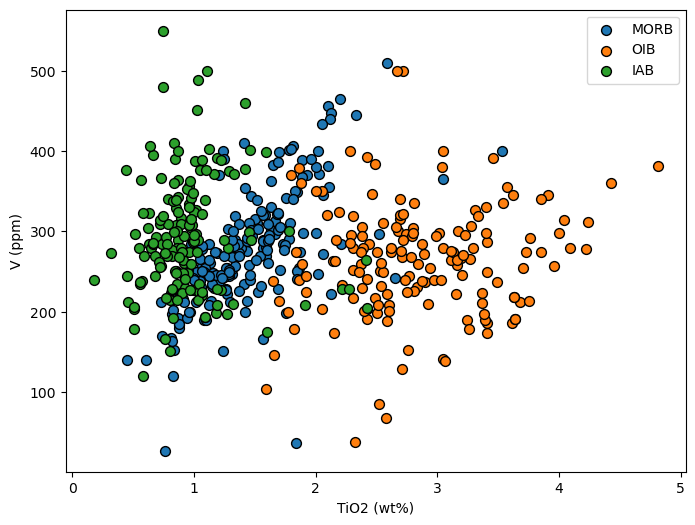

In [4]:
# Loop through the unique values of the 'affinity' column to plot each group

plt.figure(figsize=(8, 6))

for affinity in basalt_data['affinity'].unique():
    subset = basalt_data[basalt_data['affinity'] == affinity]
    plt.scatter(subset['TiO2_wt_percent'], subset['V_ppm'], label=affinity, edgecolor='k', s=50)

plt.legend()
plt.xlabel('TiO2 (wt%)')
plt.ylabel('V (ppm)')
plt.show()

### Use the pandas groupby function to group by affinity and describe the values of column 'TiO2_wt_percent'

In [5]:
basalt_data.groupby('affinity')['TiO2_wt_percent'].describe()

,count,mean,std,min,25%,50%,75%,max
affinity,,,,,,,,
IAB,229.0,0.965035,0.356350,0.18,0.78000,0.890,1.0700,2.70
MORB,230.0,1.469783,0.437550,0.45,1.16625,1.425,1.6975,3.53
OIB,210.0,2.907557,0.657444,1.51,2.46500,2.835,3.3275,4.81


Try the other column of 'V_ppm'

In [6]:
basalt_data.groupby('affinity')['V_ppm'].describe()

,count,mean,std,min,25%,50%,75%,max
affinity,,,,,,,,
IAB,160.0,292.914500,71.301634,120.0,239.500,285.5,331.000,550.0
MORB,199.0,276.795477,72.389875,27.0,237.500,272.0,309.500,510.0
OIB,166.0,266.404217,70.167589,37.6,222.575,267.5,304.775,500.0


*Can you differentiate between the different affinities on titanium or vanadium concentration alone?*

## Eye test classification method

In order to classify the basalt into their affinity based on titanium and vanadium concentrations, we can use a classification method.

The goal here is to be able to make an inference of what environment an unknown basalt formed in based on comparison to these data.

Let's say that we have three points where their affinity is unknown.
- point 1 has TiO2 of 4% and V concentration of 300 ppm
- point 2 has TiO2 of 1% and V concentration of 350 ppm
- point 3 has TiO2 of 1.9% and V concentration of 200 ppm

What do you think the classification of these three points should be?

Let's plot the data on the TiO2 vs V plot and see if we can visually classify the data.

In [7]:
sample1 = {'TiO2_wt_percent': 4, 'V_ppm': 300}
sample2 = {'TiO2_wt_percent': 1, 'V_ppm': 350}
sample3 = {'TiO2_wt_percent': 1.6, 'V_ppm': 280}

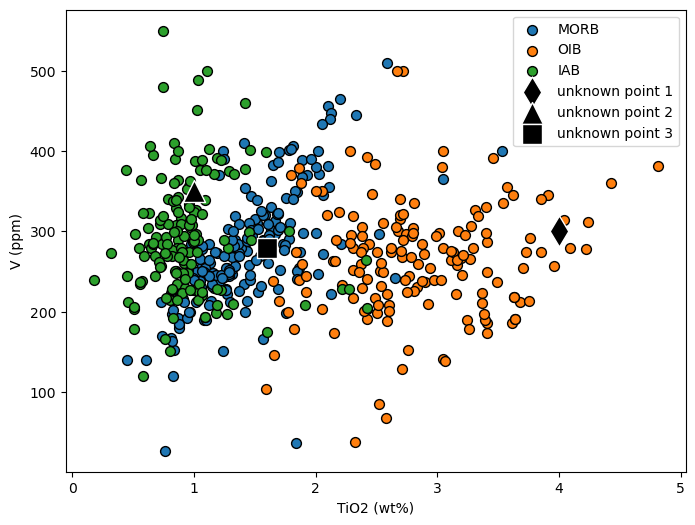

In [8]:
plt.figure(figsize=(8, 6))

for affinity in basalt_data['affinity'].unique():
    subset = basalt_data[basalt_data['affinity'] == affinity]
    plt.scatter(subset['TiO2_wt_percent'], subset['V_ppm'], label=affinity, edgecolor='k', s=50)

# ADD the unknow points using the scatter function
plt.scatter(sample1['TiO2_wt_percent'], sample1['V_ppm'], label='unknown point 1', color='black', edgecolors='white',  marker='d', s=250)
plt.scatter(sample2['TiO2_wt_percent'], sample2['V_ppm'], label='unknown point 2', color='black', edgecolors='white',  marker='^', s=250)
plt.scatter(sample3['TiO2_wt_percent'], sample3['V_ppm'], label='unknown point 3', color='black', edgecolors='white', marker='s', s=200)

plt.xlabel('TiO2 (wt%)')
plt.ylabel('V (ppm)')
plt.legend()
plt.show()

## A linear classification

An approach that has been taken in volcanic geochemistry is to draw lines to use for classification.

We are using the package scikit-learn in order to implement such a classification. Scikit-learn is a widely-used Python library for machine learning and data analysis. It provides a wide range of tools for data preprocessing, model selection, and evaluation. Its user-friendly interface and extensive documentation make it a popular choice for researchers, data analysts, and machine learning practitioners.

![scikit-learn logo](https://scikit-learn.org/stable/_static/scikit-learn-logo-small.png)

### Import sci-kit learn 

In [9]:
from sklearn.linear_model import LogisticRegression

### Define our classifier

We can use `LogisticRegression` from scikit-learn as a classifier. The algorithm finds the best straight line, also called a hyperplane, to separate different groups of data. 

Once the lines have been found they can be used predict the group of new data points based on which side of the line they fall on.

In [10]:
classifier_linear = LogisticRegression(solver='liblinear')

### Preparing the data for classification 

We need to do a bit of prep work on the data first as not all of the data have Ti (wt %) and V (ppm) data. 

Let's define a new dataframe `basalt_data_Ti_V` that has the rows that contain both values. This will result in us using fewer data than is in the total dataset.

In [11]:
basalt_data_Ti_V = basalt_data[(basalt_data['TiO2_wt_percent'].notna()) & (basalt_data['V_ppm'].notna())]

In [12]:
print(f"The number of basalt data is {len(basalt_data)}")

print(f"The number of basalt data with both Ti and V is {len(basalt_data_Ti_V)}")

The number of basalt data is 756
The number of basalt data with both Ti and V is 514


In machine learning literature and code conventions, uppercase "X" is often used to represent the matrix of feature variables (predictors), while lowercase "y" is used to represent the target variable (response).

This notation is used to visually distinguish between the two variables and indicate that "X" is a matrix (usually with multiple columns for features), while "y" is a vector (usually with a single column representing the target variable). 

The uppercase "X" signifies a multi-dimensional data structure, and the lowercase "y" signifies a one-dimensional data structure.

In [13]:
# Let's define X as the features of ['TiO2_wt_percent', 'V_ppm'] and y as the target variable 'affinity'
X = basalt_data_Ti_V[['TiO2_wt_percent', 'V_ppm']].values
y = basalt_data_Ti_V['affinity'].values

The categorical variables that represent different categories that we have here are: 'MORB', 'IAB', and 'OIB'. However, most machine learning algorithms require numerical inputs. 

Label encoding is a technique that transforms the categorical variables into numerical labels. We can use the `sklearn.preprocessing` `LabelEncoder` function to do this task for us.

In [14]:
from sklearn.preprocessing import LabelEncoder

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

Let's take a look at the original 'affinity' categories and the encoded categories.

In [15]:
print(f"The original affinity values are {np.unique(y)}")
print(f"The encoded affinity values are {np.unique(y_encoded)}")

The original affinity values are ['IAB' 'MORB' 'OIB']
The encoded affinity values are [0 1 2]


### Fit/train the classifier

Now that we have `X` as DataFrame of `['TiO2_wt_percent', 'V_ppm']` and `y_encoded` as numerical representation of the categories we can fit the classifier to the data.

To do this, we feed the DataFrame of the data and the array of the classification into a `.fit` function preformed on the classifier object.

In [16]:
## Define the classifier
classifier_linear.fit(X, y_encoded)

LogisticRegression(solver='liblinear')

### Visualizing the decision boundaries

Let's make a 101 x 101 grid of x and y values between 0 and the maximum values.

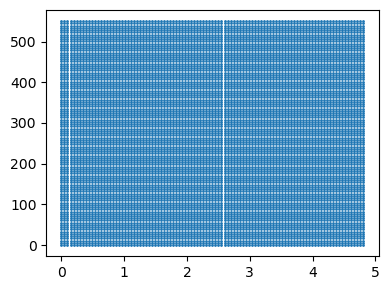

In [17]:
# Generate a grid of points over the feature space
xx, yy = np.meshgrid(np.linspace(0, max(basalt_data_Ti_V['TiO2_wt_percent']), 101),
                     np.linspace(0, max(basalt_data_Ti_V['V_ppm']), 101))
grid = np.array([xx.ravel(), yy.ravel()]).T

plt.figure(figsize=(4, 3))
plt.scatter(xx, yy, s=1)
plt.tight_layout()

### Classify the grid

We can then predict the class labels for each point in the grid.

In [18]:
grid_classes = classifier_linear.predict(grid)

We can now plot up those grid with the actual data

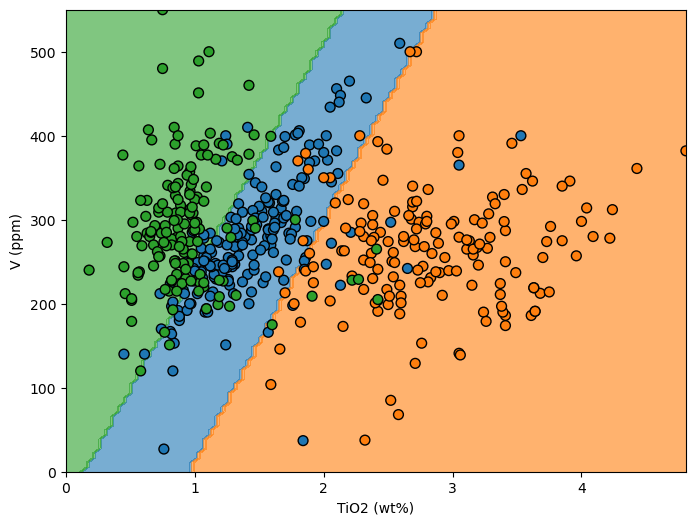

In [19]:
grid_classes = grid_classes.reshape(xx.shape)
cmap = ListedColormap(['C2', 'C0', 'C1']) # Define the colors to make the decision boundary and the data points with the same colors

plt.figure(figsize=(8, 6))

# Plot the decision boundary
plt.contourf(xx, yy, grid_classes, cmap=cmap, alpha=0.6)

# Add real data points
plt.scatter(basalt_data_Ti_V['TiO2_wt_percent'], basalt_data_Ti_V['V_ppm'], c=y_encoded, cmap=cmap, edgecolor='k', s=50)

plt.xlabel('TiO2 (wt%)')
plt.ylabel('V (ppm)')
plt.show()

We can now plot the unknown points onto this classified grid and see what their assignment would be.

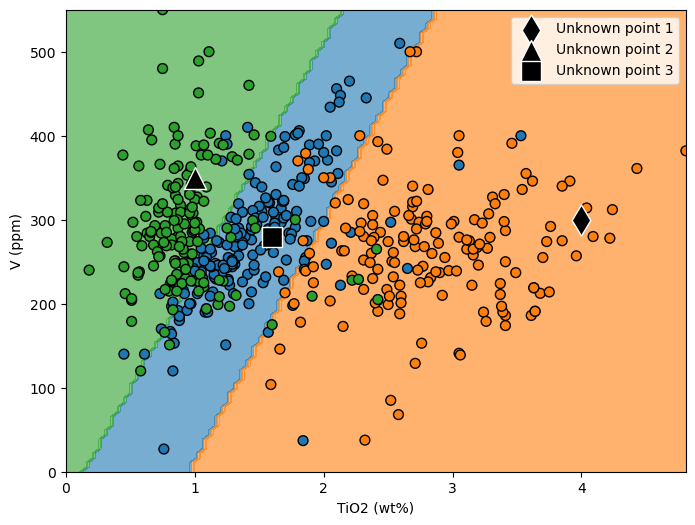

In [20]:
cmap = ListedColormap(['C2', 'C0', 'C1'])
grid_classes = grid_classes.reshape(xx.shape)

plt.figure(figsize=(8, 6))

# Plot the decision boundary 
plt.contourf(xx, yy, grid_classes, cmap=cmap, alpha=0.6)

# Add real data points
plt.scatter(basalt_data_Ti_V['TiO2_wt_percent'], basalt_data_Ti_V['V_ppm'], c=y_encoded, cmap=cmap, edgecolor='k', s=50)

# ADD the unknow points
plt.scatter(sample1['TiO2_wt_percent'], sample1['V_ppm'], label='Unknown point 1', color='black', edgecolors='white',  marker='d', s=250)
plt.scatter(sample2['TiO2_wt_percent'], sample2['V_ppm'], label='Unknown point 2', color='black', edgecolors='white',  marker='^', s=250)
plt.scatter(sample3['TiO2_wt_percent'], sample3['V_ppm'], label='Unknown point 3', color='black', edgecolors='white', marker='s', s=200)

plt.legend()
plt.xlabel('TiO2 (wt%)')
plt.ylabel('V (ppm)')
plt.show()

While we can visually see where the points fall, we can also ask the classifier to predict the values of these unknown points using `classifier_svc_linear.predict()`. 

We can return the actual labels of the data (rather than the encoded numbers) by using `le.inverse_transform()`

In [21]:
# Predict the class of the unknown points
prediction_point1_encoded = classifier_linear.predict([[sample1['TiO2_wt_percent'], sample1['V_ppm']]])
prediction_point2_encoded = classifier_linear.predict([[sample2['TiO2_wt_percent'], sample2['V_ppm']]])
prediction_point3_encoded = classifier_linear.predict([[sample3['TiO2_wt_percent'], sample3['V_ppm']]])

# Decode the predicted classes into the original labels
prediction_point1 = le.inverse_transform(prediction_point1_encoded)
prediction_point2 = le.inverse_transform(prediction_point2_encoded)
prediction_point3 = le.inverse_transform(prediction_point3_encoded)

# Print the results
print(f"Sample 1 {sample1} is classified as class {prediction_point1_encoded}, which is {prediction_point1}")
print(f"Sample 2 {sample2} is classified as class {prediction_point2_encoded}, which is {prediction_point2}")
print(f"Sample 3 {sample3} is classified as class {prediction_point3_encoded}, which is {prediction_point3}")

Sample 1 {'TiO2_wt_percent': 4, 'V_ppm': 300} is classified as class [2], which is ['OIB']
Sample 2 {'TiO2_wt_percent': 1, 'V_ppm': 350} is classified as class [0], which is ['IAB']
Sample 3 {'TiO2_wt_percent': 1.6, 'V_ppm': 280} is classified as class [1], which is ['MORB']


### Training and testing

How good is our linear classifier? To answer this we'll need to find out how frequently our classifications are correct.

**Discussion question**

*How should we determine the accuracy of this classification scheme using the data that we already have?*

### Why Do We Need to Set Training, Validation, and Test Datasets?

When building a machine learning model, it's crucial to evaluate its performance accurately and ensure it generalizes well to new, unseen data. To achieve this, we typically split our dataset into three parts: training, validation, and test sets.

- The training set is used to train the model. The model learns the patterns and relationships within this data. The goal is to minimize the error on the training set by adjusting the model's parameters.
- The validation set is used to tune the model's hyperparameters. It helps in assessing the model's performance during the training phase and prevents overfitting. By evaluating the model on the validation set, we can choose the best model configuration.
- The test set is used to evaluate the final model's performance. It provides an unbiased estimate of how well the model will perform on new, unseen data. The test set should only be used once the model is fully trained and all hyperparameters are tuned.

### Variance and Bias Trade-Off

In machine learning, the variance and bias trade-off is a fundamental concept that affects model performance.

- Bias refers to the error introduced by approximating a real-world problem, which may be complex, by a simplified model. High bias can cause the model to miss relevant relations between features and target outputs (underfitting).
- Variance refers to the error introduced by the model's sensitivity to small fluctuations in the training set. High variance can cause the model to model the random noise in the training data rather than the intended outputs (overfitting).

**Trade-Off**:
- **High Bias, Low Variance:** The model is too simple and cannot capture the underlying patterns of the data (underfitting).
- **Low Bias, High Variance:** The model is too complex and captures noise in the training data (overfitting).
- **Optimal Balance:** The goal is to find a balance where the model has low bias and low variance, meaning it generalizes well to new data.

By using training, validation, and test sets, we can monitor and adjust our model to achieve this balance, ensuring it performs well on unseen data. 

Let's try it in our classification problem.


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Split the data into training and testing sets

Because we are using a linear classifier, there are not many hyperparameters to tune. For simplicity, we will only divide the data into training and testing sets, using 70% of the data for training and 30% for testing.


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

In [24]:
print(f"Number of training samples: {len(X_train)}")
print(f"Number of testing samples: {len(X_test)}")

Number of training samples: 359
Number of testing samples: 155


### Fit the model to the training data

In [25]:
classifier_linear.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

### Make predictions on the testing data

The test set was held back from training. We can use it to evaluate the model. How often are the categorizations correction? To do this evaluation, we can predict the categories using `classifier_svc_linear.predict()` and the compare those to the actual labels using `accuracy_score()`

In [26]:
# Make predictions on the test set
y_pred = classifier_linear.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"The accuracy of the classifier is {accuracy:.2f}")

The accuracy of the classifier is 0.85


The above `accuracy_score` computes the proportion of correct predictions out of the total number of predictions. The accuracy score ranges from 0 to 1, where a higher score indicates better classification performance.

We can make a plot that is the classification based on the training data and can then plot the test data. The fraction of points that are plotting within the correct classification corresponds to the accuracy score.

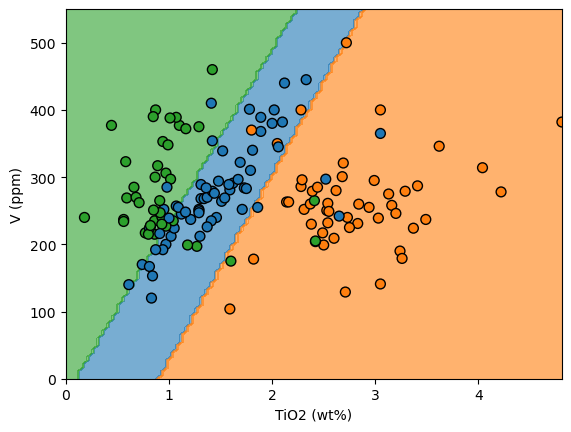

In [27]:
grid_classes = classifier_linear.predict(grid)
grid_classes = grid_classes.reshape(xx.shape)

cmap = ListedColormap(['C2', 'C0', 'C1'])

plt.figure()

# Plot the decision boundary
plt.contourf(xx, yy, grid_classes, cmap=cmap, alpha=0.6)

# Plot the test data points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap, edgecolor='k', s=50)

plt.xlabel('TiO2 (wt%)')
plt.ylabel('V (ppm)')
plt.show()

How well did the linear classifier do?

## Visualizing the classification using a "confusion matrix"

A confusion matrix is a table that is used to evaluate the performance of a classification algorithm. It visually displays the accuracy of a classifier by comparing its predicted labels against the true labels. The matrix consists of rows and columns that represent the true and predicted classes, respectively. Each cell in the matrix corresponds to the number of samples for a specific combination of true and predicted class labels.

The main diagonal of the matrix represents the correctly classified instances, while the off-diagonal elements represent the misclassified instances. By analyzing the confusion matrix, you can gain insights into the performance of the classifier and identify where it gets "confused."

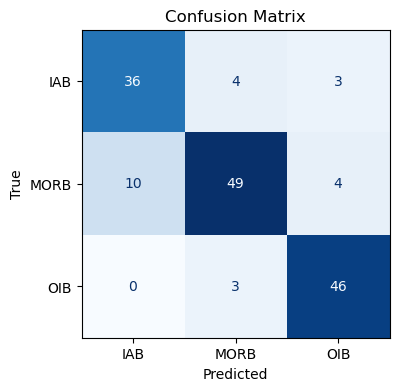

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using ConfusionMatrixDisplay
fig, ax = plt.subplots(figsize=(4, 4))
class_names = le.inverse_transform(np.unique(y_test)).astype(str)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, ax=ax, values_format='d', colorbar=False)

ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
plt.show()


Can you interpret the confusion matrix? What does it tell you about the performance of the classifier?